# <div style="text-align:center">프로그래밍3 - 구글 플레이 스토어 <br/><10조 발표></div>

<div style="text-align: right"> <b>201804196 김성진 </b></div>
<div style="text-align: right"> <b>201804222 이건우 </b></div>
<div style="text-align: right"> <b>201804237 이훈규 </b></div>

---
### 목차 
- 데이터에 대한 설명 
- 데이터 탐색 및 분석 포인트 설명 
- 데이터 분석
- 의미 해석 및 가치 도출
---

# 1. 구글 플레이 스토어에서 제일 잘 팔린 어플 확인 및 팔린어플의 연도별 월별 판매량 확인하기

## 먼저 데이터를 불러온뒤 데이터 확인

In [1]:
import pandas as pd
import numpy as np

## 데이터 불러오기
데이터를 불러오고 데이터를 확인

## 행 이름을 App Name으로 선택 후 데이터셋 가져오기

In [2]:
chart = pd.read_csv('data/Google-Playstore.csv')
chart.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [3]:
chart.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

# Category, Installs를 기준으로 집계함수 만들기

## 몇몇 column 들의 ' '인 부분을 '_'로 바꾸기

In [4]:
def change_col_name(col_name):
    col_name = col_name.replace(' ', '_')
    return col_name

chart.rename(columns = change_col_name, inplace=True)
chart

,App_Name,App_Id,Category,Rating,Rating_Count,Installs,Minimum_Installs,Maximum_Installs,Free,Price,...,Developer_Website,Developer_Email,Released,Last_Updated,Content_Rating,Privacy_Policy,Ad_Supported,In_App_Purchases,Editors_Choice,Scraped_Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


## 별도의 리스트를 만들어 필요한 컬럼만을 가져오기

In [5]:
list_a = ['App_Name', 'Category', 'Rating', 'Rating_Count', 'Installs', 'Free']
chart_filtered = chart.loc[:, list_a]
chart_filtered.head()

,App_Name,Category,Rating,Rating_Count,Installs,Free
0,Gakondo,Adventure,0.0,0.0,10+,True
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True
2,Vibook,Productivity,0.0,0.0,50+,True
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,True
4,GROW.me,Tools,0.0,0.0,100+,True


## null값 존재여부 및 dtype 확인

In [6]:
chart_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   App_Name      object 
 1   Category      object 
 2   Rating        float64
 3   Rating_Count  float64
 4   Installs      object 
 5   Free          bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 90.4+ MB


## 컬럼별로 na값이 있는지 확인

In [7]:
chart_filtered.isna().any()

App_Name         True
Category        False
Rating           True
Rating_Count     True
Installs         True
Free            False
dtype: bool

## na값 처리 및 Raiting_Count 형변환

In [8]:
chart_filtered['Category'] = chart_filtered['Category'].fillna('Other')
chart_filtered[['App_Name', 'Developer_Id']] = chart_filtered[['App_Name', 'Free']].fillna('no_input')
chart_filtered[['Rating', 'Rating_Count', 'Installs']] = chart_filtered[['Rating', 'Rating_Count', 'Installs']].fillna(0)
chart_filtered['Rating_Count'] = chart_filtered['Rating_Count'].astype('int')
chart_filtered.isna().any()

App_Name        False
Category        False
Rating          False
Rating_Count    False
Installs        False
Free            False
Developer_Id    False
dtype: bool

## Installs컬럼의 밸류값 가독성 있게 바꾸기

In [9]:
chart_filtered['Installs'] = (
    chart_filtered['Installs']
    .str.replace('1,000,000+', '1mn')
    .str.replace('5,000,000+', '5mn')
    .str.replace('10,000,000+', '10mn')
    .str.replace('50,000,000+', '50mn')
    .str.replace('100,000,000+', '100mn')
    .str.replace('500,000,000+', '500mn')
    .str.replace('1mn,000+', '1bn')
    .str.replace('5mn,000+', '5bn')
)

C:\Users\82104\AppData\Local\Temp/ipykernel_32572/1892856321.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  chart_filtered['Installs']


## 제대로 바뀌었는지 확인

In [10]:
chart_filtered['Installs'].value_counts()

100+         443368
1,000+       398199
10+          300156
10,000+      256723
500+         189077
50+          170465
5,000+       143593
100,000+     110257
50,000+       75359
5+            73772
1+            65345
1mn+          33650
500,000+      27012
0+            11566
5mn+           6595
10mn+          6192
50mn+           824
100mn+          549
500mn+           65
1bn+             55
5bn+             14
10mn,000+         1
Name: Installs, dtype: int64

## 100만 다운로드 이상의 어플들만 추출

In [11]:
for_popular = ['1mn+', '5mn+', '10mn+', '50mn+', '100mn+', '500mn+', '1bn+', '5bn+']
chart_popular = chart_filtered[chart_filtered['Installs'].isin(for_popular)]
chart_popular

,App_Name,Category,Rating,Rating_Count,Installs,Free,Developer_Id
92,Car Games Revival: Car Racing Games for Kids,Racing,3.9,55218,10mn+,True,True
125,Smart File Manager,Productivity,4.4,18241,1mn+,True,True
183,Transmute Robot Superhero,Lifestyle,3.9,3157,1mn+,True,True
261,Photo Collage,Photography,3.6,1093,1mn+,True,True
291,Taxsee Driver,Maps & Navigation,4.4,246,5mn+,True,True
...,...,...,...,...,...,...,...
2312411,Tuk Tuk Auto Rickshaw Driving,Simulation,3.9,8095,1mn+,True,True
2312447,Snake Evolution - Mutant Serpent Game,Casual,4.4,15762,1mn+,True,True
2312589,3 Days to Die - Escape Horror Game,Arcade,4.2,23586,1mn+,True,True
2312677,Modern Strike : Multiplayer FPS - Critical Action,Role Playing,3.9,78351,10mn+,True,True


## Category, Installs를 그룹으로 집계함수 만들기

In [12]:
(
    chart_popular
    .groupby(['Category','Installs'])
    .agg({'Rating':['mean', 'var', 'size'],
         'Rating_Count':['sum','mean','max','min']})
)

Rating                 Rating_Count                \
                       mean       var  size          sum          mean   
Category Installs                                                        
Action   100mn+    4.263636  0.051205    44    182719607  4.152718e+06   
         10mn+     4.153425  0.071836   365     94726369  2.595243e+05   
         1mn+      3.960844  0.275199  1351     30960072  2.291641e+04   
         500mn+    4.275000  0.009167     4    137591048  3.439776e+07   
         50mn+     4.217391  0.030870    69     74439223  1.078829e+06   
...                     ...       ...   ...          ...           ...   
Word     100mn+    4.500000       NaN     1      1897173  1.897173e+06   
         10mn+     4.388710  0.102985    62     20919291  3.374079e+05   
         1mn+      4.324127  0.133684   315     10931684  3.470376e+04   
         50mn+     4.350000  0.069444    10      9257684  9.257684e+05   
         5mn+      4.410714  0.115156    56      7262587  1.296891e+05   

                                      
                        max      min  
Category Installs                     
Action   100mn+    26860860   130487  
         10mn+      2132331      660  
         1mn+        624980        0  
         500mn+    89177097  1285629  
         50mn+      4888977    18598  
...                     ...      ...  
Word     100mn+     1897173  1897173  
         10mn+      2251455      209  
         1mn+        254650       11  
         50mn+      1723150   390689  
         5mn+        750576        6  

[269 rows x 7 columns]

## 열쪽 인덱스 정리 및 지수표현식 제거

In [13]:
def flatten_cols(df):
    df.columns = ['_'.join(x) for x in df.columns.to_flat_index()]
    return df

chart_agg = (
    chart_popular
    .groupby(['Category', 'Installs'])
    .agg({'Rating':['mean', 'var', 'size'],
         'Rating_Count': ['sum', 'mean', 'max', 'min']})
    .pipe(flatten_cols)
)
#지수표현식 제거 및 float 소수점 둘째자리까지
pd.options.display.float_format = '{:.2f}'.format
chart_agg

Rating_mean  Rating_var  Rating_size  Rating_Count_sum  \
Category Installs                                                           
Action   100mn+           4.26        0.05           44         182719607   
         10mn+            4.15        0.07          365          94726369   
         1mn+             3.96        0.28         1351          30960072   
         500mn+           4.28        0.01            4         137591048   
         50mn+            4.22        0.03           69          74439223   
...                        ...         ...          ...               ...   
Word     100mn+           4.50         NaN            1           1897173   
         10mn+            4.39        0.10           62          20919291   
         1mn+             4.32        0.13          315          10931684   
         50mn+            4.35        0.07           10           9257684   
         5mn+             4.41        0.12           56           7262587   

                   Rating_Count_mean  Rating_Count_max  Rating_Count_min  
Category Installs                                                         
Action   100mn+           4152718.34          26860860            130487  
         10mn+             259524.30           2132331               660  
         1mn+               22916.41            624980                 0  
         500mn+          34397762.00          89177097           1285629  
         50mn+            1078829.32           4888977             18598  
...                              ...               ...               ...  
Word     100mn+           1897173.00           1897173           1897173  
         10mn+             337407.92           2251455               209  
         1mn+               34703.76            254650                11  
         50mn+             925768.40           1723150            390689  
         5mn+              129689.05            750576                 6  

[269 rows x 7 columns]

## reset_index()로 행쪽 인덱스 처리

In [14]:
chart_agg.reset_index()

,Category,Installs,Rating_mean,Rating_var,Rating_size,Rating_Count_sum,Rating_Count_mean,Rating_Count_max,Rating_Count_min
0,Action,100mn+,4.26,0.05,44,182719607,4152718.34,26860860,130487
1,Action,10mn+,4.15,0.07,365,94726369,259524.30,2132331,660
2,Action,1mn+,3.96,0.28,1351,30960072,22916.41,624980,0
3,Action,500mn+,4.28,0.01,4,137591048,34397762.00,89177097,1285629
4,Action,50mn+,4.22,0.03,69,74439223,1078829.32,4888977,18598
...,...,...,...,...,...,...,...,...,...
264,Word,100mn+,4.50,NaN,1,1897173,1897173.00,1897173,1897173
265,Word,10mn+,4.39,0.10,62,20919291,337407.92,2251455,209
266,Word,1mn+,4.32,0.13,315,10931684,34703.76,254650,11
267,Word,50mn+,4.35,0.07,10,9257684,925768.40,1723150,390689


# 용량 세이브를 위해 카테고리화

In [15]:
chart_popular.memory_usage(deep=True)

Index            383552
App_Name        4326994
Category        3184538
Rating           383552
Rating_Count     191776
Installs        2932828
Free              47944
Developer_Id      47944
dtype: int64

## Category와 Installs를 카테고리화시 확실히 용량이 세이브됩니다.

In [16]:
(
    chart_popular
    .assign(Category=chart_popular.Category.astype('category'))
    .assign(Installs=chart_popular.Installs.astype('category'))
    .memory_usage(deep=True)
)

Index            383552
App_Name        4326994
Category          52214
Rating           383552
Rating_Count     191776
Installs          48738
Free              47944
Developer_Id      47944
dtype: int64

## 용량 세이브를 위해 카테고리화 후 집계함수 만들기

In [17]:
chart_agg2 = (
    chart_popular
    .assign(Category=chart_popular.Category.astype('category'))
    .assign(Installs=chart_popular.Installs.astype('category'))
    .groupby(['Category', 'Installs'])
    .agg({'Rating':['mean', 'var', 'size'],
         'Rating_Count': ['sum', 'mean', 'max', 'min']})
    .pipe(flatten_cols)
    .reset_index()
)
#없는 조합까지 전부 그룹화가 됩니다.
chart_agg2

,Category,Installs,Rating_mean,Rating_var,Rating_size,Rating_Count_sum,Rating_Count_mean,Rating_Count_max,Rating_Count_min
0,Action,100mn+,4.26,0.05,44,182719607,4152718.34,26860860.00,130487.00
1,Action,10mn+,4.15,0.07,365,94726369,259524.30,2132331.00,660.00
2,Action,1bn+,NaN,NaN,0,0,NaN,NaN,NaN
3,Action,1mn+,3.96,0.28,1351,30960072,22916.41,624980.00,0.00
4,Action,500mn+,4.28,0.01,4,137591048,34397762.00,89177097.00,1285629.00
...,...,...,...,...,...,...,...,...,...
379,Word,1mn+,4.32,0.13,315,10931684,34703.76,254650.00,11.00
380,Word,500mn+,NaN,NaN,0,0,NaN,NaN,NaN
381,Word,50mn+,4.35,0.07,10,9257684,925768.40,1723150.00,390689.00
382,Word,5bn+,NaN,NaN,0,0,NaN,NaN,NaN


## group_by에 observed=True 적용하여 존재하는 조합만 생성

In [18]:
chart_agg2 = (
    chart_popular
    .assign(Category=chart_popular.Category.astype('category'))
    .assign(Installs=chart_popular.Installs.astype('category'))
    .groupby(['Category', 'Installs'], observed=True)
    .agg({'Rating':['mean', 'var', 'size'],
         'Rating_Count': ['sum', 'mean', 'max', 'min']})
    .pipe(flatten_cols)
    .reset_index()
)
chart_agg2

,Category,Installs,Rating_mean,Rating_var,Rating_size,Rating_Count_sum,Rating_Count_mean,Rating_Count_max,Rating_Count_min
0,Racing,10mn+,4.14,0.13,238,49022292,205976.02,4486851,0
1,Racing,1mn+,3.97,0.13,748,11101362,14841.39,129493,0
2,Racing,5mn+,4.07,0.15,191,11701494,61264.37,565332,0
3,Racing,100mn+,4.28,0.02,25,72397387,2895895.48,9553638,477477
4,Racing,50mn+,4.21,0.03,35,22707426,648783.60,2490675,8061
...,...,...,...,...,...,...,...,...,...
264,Comics,5mn+,4.05,0.10,13,1114458,85727.54,449977,207
265,Comics,50mn+,4.60,NaN,1,1746185,1746185.00,1746185,1746185
266,Events,10mn+,3.70,NaN,1,77398,77398.00,77398,77398
267,Events,1mn+,3.90,0.59,22,279874,12721.55,53626,3393


In [19]:
chart.head()

,App_Name,App_Id,Category,Rating,Rating_Count,Installs,Minimum_Installs,Maximum_Installs,Free,Price,...,Developer_Website,Developer_Email,Released,Last_Updated,Content_Rating,Privacy_Policy,Ad_Supported,In_App_Purchases,Editors_Choice,Scraped_Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.00,0.00,10+,10.00,15,True,0.00,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40,64.00,"5,000+",5000.00,7662,True,0.00,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.00,0.00,50+,50.00,58,True,0.00,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00,5.00,10+,10.00,19,True,0.00,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.00,0.00,100+,100.00,478,True,0.00,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


## 유료인 어플이면서 평점수 50개 이상인 어플 추려내기

In [20]:
p1 = chart['Free'] == True
p2 = chart['Ad_Supported'] == True
p3 = chart['Rating_Count'] > 7_000
p_fin = p1&p2&p3

In [21]:
app_Free = chart.loc[p_fin, ['Content_Rating', 'Category', 'Rating', 'Maximum_Installs']]
app_Free.rename(columns = {'Maximum_Installs':'max_Down'}, inplace=True)
app_Free = app_Free.assign(max_Down= app_Free.max_Down.astype('int'))

app_Free.head()

,Content_Rating,Category,Rating,max_Down
92,Everyone,Racing,3.90,30052692
125,Everyone,Productivity,4.40,3741253
372,Everyone,Tools,4.50,820680
547,Everyone,Simulation,3.90,3040422
561,Everyone,Social,4.40,13629503


In [22]:
app_Free.Content_Rating.value_counts()

Everyone           24489
Teen                6127
Everyone 10+        1960
Mature 17+          1422
Adults only 18+        6
Unrated                1
Name: Content_Rating, dtype: int64

## 밸류값이 두개밖에 없는 18+ 밸류의 행 삭제

In [23]:
app_Free.drop(app_Free.loc[app_Free['Content_Rating']=='Adults only 18+'].index, inplace=True)
app_Free.Content_Rating.value_counts()

Everyone        24489
Teen             6127
Everyone 10+     1960
Mature 17+       1422
Unrated             1
Name: Content_Rating, dtype: int64

## Category의 수가 많으므로 가장 밸류값이 많은 10개만 확인

In [24]:
top_ten = app_Free.Category.value_counts().index[:10]
app_Free = app_Free.loc[app_Free['Category'].isin(top_ten)]
app_Free

,Content_Rating,Category,Rating,max_Down
372,Everyone,Tools,4.50,820680
547,Everyone,Simulation,3.90,3040422
640,Everyone,Sports,4.10,1358733
674,Everyone,Simulation,4.40,539037
686,Everyone,Tools,4.60,3993151
...,...,...,...,...
2312348,Everyone,Puzzle,4.60,4444282
2312411,Everyone,Simulation,3.90,1299098
2312447,Everyone,Casual,4.40,1193422
2312589,Teen,Arcade,4.20,3523403


## 콘텐츠 등급 및 카테고리별 최대 다운로드, 최고 평점, 평균 다운로드, 평졈 평균, 카테고리별 어플 수, 다운로드 전체 합과 각 행에서 최고수치를 갱신하는 카테고리에 하이라이트 넣어주기

In [25]:
(
    app_Free
    .groupby(['Content_Rating', 'Category'])
    .agg(max_Rating=pd.NamedAgg(column='Rating', aggfunc='max'),
        mean_Rating=pd.NamedAgg(column='Rating',aggfunc='mean'),
        max_Down=pd.NamedAgg(column='max_Down',aggfunc='max'),
        mean_Down=pd.NamedAgg(column='max_Down',aggfunc='mean'),
        sum_Down=pd.NamedAgg(column='max_Down',aggfunc='sum'),
        size=pd.NamedAgg(column='max_Down',aggfunc='size'))
    .rename_axis(['Agg_Cols'], axis=1)
    .unstack(['Category'], fill_value=0)
    .swaplevel(0, axis='columns')
    .stack(['Agg_Cols'])
    .style.highlight_max(axis=1)
    .format('{:.2f}') 
)

# 시계열 데이터셋을 이용한 히스토그램 만들기

In [26]:
chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App_Name           object 
 1   App_Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating_Count       float64
 5   Installs           object 
 6   Minimum_Installs   float64
 7   Maximum_Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum_Android    object 
 13  Developer_Id       object 
 14  Developer_Website  object 
 15  Developer_Email    object 
 16  Released           object 
 17  Last_Updated       object 
 18  Content_Rating     object 
 19  Privacy_Policy     object 
 20  Ad_Supported       bool   
 21  In_App_Purchases   bool   
 22  Editors_Choice     bool   
 23  Scraped_Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

## 교육 분야의 어플이 가장 많은 수를 차지합니다

In [27]:
chart.Category.value_counts().iloc[:10]

Education            241090
Music & Audio        154906
Tools                143988
Business             143771
Entertainment        138276
Lifestyle            118331
Books & Reference    116728
Personalization       89210
Health & Fitness      83510
Productivity          79698
Name: Category, dtype: int64

## 교육 분야의 어플들 중 어플 이름, 어플 발매일, 최근 업데이트 날짜의 컬럼을 가져옵니다.

In [28]:
d1 = chart.Category=='Education'

chart_date = chart.loc[d1, ['App_Name', 'Released', 'Last_Updated']]

In [29]:
import datetime

In [30]:
print(chart_date.Released, chart_date.Last_Updated)

37         Jun 18, 2020
67          Jan 9, 2021
72         Oct 15, 2020
75         Sep 20, 2019
96          Jul 5, 2017
               ...     
2312934    Jun 15, 2020
2312937    Jan 15, 2020
2312938    May 22, 2018
2312940    Jan 17, 2018
2312941    Aug 19, 2018
Name: Released, Length: 241090, dtype: object 37         Jun 01, 2021
67         May 18, 2021
72         Jun 13, 2021
75         Feb 29, 2020
96         Jul 05, 2017
               ...     
2312934    Aug 31, 2020
2312937    Jan 15, 2020
2312938    Dec 14, 2018
2312940    Feb 02, 2018
2312941    Aug 19, 2018
Name: Last_Updated, Length: 241090, dtype: object


## 위 두 컬럼을 datetime 양식으로 변환

In [31]:
chart_date.Released = pd.to_datetime(chart_date.Released, format='%b %d, %Y')
chart_date.Last_Updated = pd.to_datetime(chart_date.Last_Updated, format='%b %d, %Y')
chart_date.head()

,App_Name,Released,Last_Updated
37,Calculus Tutorial 1: Introduction,2020-06-18,2021-06-01
67,RACE ACADEMY,2021-01-09,2021-05-18
72,Triple Point Academy,2020-10-15,2021-06-13
75,The Battle at the Alamo 3D Viewer,2019-09-20,2020-02-29
96,Духовно-нравственная культура (ДНК),2017-07-05,2017-07-05


## rDate에 발매일의 year만 뽑아서 시리즈화

In [32]:
rDate = (
    chart_date.Released
    .dropna()
    .sort_values(ascending=True)
    .groupby(chart_date.Released.dt.year)
)
rDate

## 교육 어플들의 연도별 발매 수의 막대그래프

<AxesSubplot:xlabel='Released'>

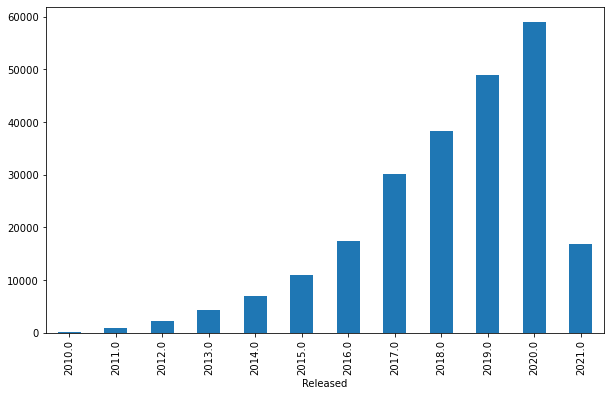

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
rDate.count().plot(kind='bar')

## 위의 발매일과 동일하게 최근 업데이트 일자의 연도만 뽑아서 시리즈로 만들었습니다

In [34]:
luDate = (
    chart_date.Last_Updated
    .dropna()
    .sort_values(ascending=True)
    .groupby(chart_date.Last_Updated.dt.year)
)
luDate

<AxesSubplot:xlabel='Last_Updated'>

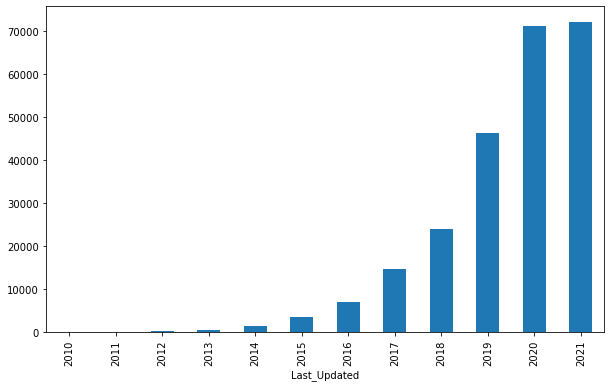

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
luDate.count().plot(kind='bar')

## 20년도와 21년도에 업데이트된 행만을 뽑아서 연도 및 월별로 그래프 만들기

In [36]:
y1 = chart_date['Last_Updated'].dt.year == 2020
y2 = chart_date['Last_Updated'].dt.year == 2021
y_fin = y1|y2
chart_date2 = chart_date.loc[y_fin]

luDate2 = (
    chart_date2
    .Last_Updated
    .sort_values(ascending=True)
    .groupby([chart_date.Last_Updated.dt.year, chart_date.Last_Updated.dt.month])
)

<AxesSubplot:xlabel='Last_Updated,Last_Updated'>

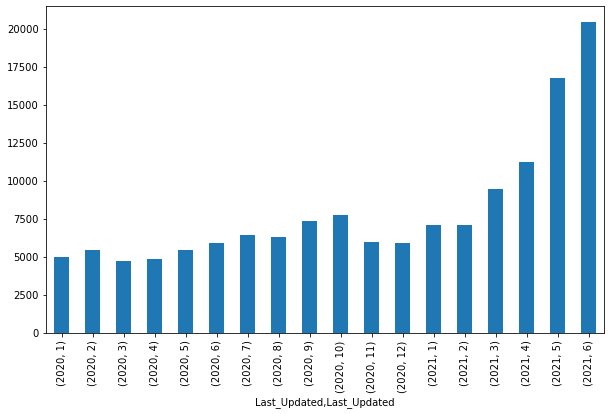

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
luDate2.count().plot(kind='bar')

---
# 평점이 높은 어플 확인과 평점이 높은 어플의 특징 확인

In [38]:
import pandas as pd
import numpy as np

# 데이터를 불러온 뒤 데이터 타입을 확인

In [39]:
chart=pd.read_csv('data/Google-Playstore.csv')
type(chart)

pandas.core.frame.DataFrame

## 데이터 타입과 용량이 얼마나 차지하는 지 확인(361차지)

In [40]:
chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

## googleplaystore의 기술통계를 확인

In [41]:
chart.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,2290061.00,2.20,2.11,0.00,0.00,2.90,4.30,5.00
Rating Count,2290061.00,2864.84,212162.57,0.00,0.00,6.00,42.00,138557570.00
Minimum Installs,2312837.00,183445.21,15131439.06,0.00,50.00,500.00,5000.00,10000000000.00
Maximum Installs,2312944.00,320201.71,23554954.89,0.00,84.00,695.00,7354.00,12057627016.00
Price,2312944.00,0.10,2.63,0.00,0.00,0.00,0.00,400.00


# 데이터 전처리

## 이제 googleplaystore의 na값이 얼마나 있는 지 확인

In [42]:
chart.isna().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

## na값 처리

In [43]:
chart=chart.dropna()

In [44]:
chart.isna().sum()

App Name             0
App Id               0
Category             0
Rating               0
Rating Count         0
Installs             0
Minimum Installs     0
Maximum Installs     0
Free                 0
Price                0
Currency             0
Size                 0
Minimum Android      0
Developer Id         0
Developer Website    0
Developer Email      0
Released             0
Last Updated         0
Content Rating       0
Privacy Policy       0
Ad Supported         0
In App Purchases     0
Editors Choice       0
Scraped Time         0
dtype: int64

## 필요한 컬럼들만 추출

In [45]:
list_b=['App Name','Category','Rating','Rating Count','Installs','Free']
chart_filtered2=chart.loc[:,list_b]
chart_filtered2

,App Name,Category,Rating,Rating Count,Installs,Free
0,Gakondo,Adventure,0.00,0.00,10+,True
1,Ampere Battery Info,Tools,4.40,64.00,"5,000+",True
4,GROW.me,Tools,0.00,0.00,100+,True
5,IMOCCI,Social,0.00,0.00,50+,True
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.70,820.00,"50,000+",True
...,...,...,...,...,...,...
2312933,Caustic Editor for VolcaSample,Music & Audio,4.00,344.00,"500,000+",True
2312934,Vietnamese - English Translator,Education,0.00,0.00,5+,True
2312938,Lero TOEFL Recorder + Timer,Education,3.40,17.00,"1,000+",True
2312940,ORU Online,Education,0.00,0.00,100+,True


## 용량이 60dm로 변화

In [46]:
chart_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287191 entries, 0 to 2312942
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   App Name      1287191 non-null  object 
 1   Category      1287191 non-null  object 
 2   Rating        1287191 non-null  float64
 3   Rating Count  1287191 non-null  float64
 4   Installs      1287191 non-null  object 
 5   Free          1287191 non-null  bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 60.2+ MB


## Installs(설치수)의 값들에 +와,가 있음을 확인

In [47]:
chart_filtered2

,App Name,Category,Rating,Rating Count,Installs,Free
0,Gakondo,Adventure,0.00,0.00,10+,True
1,Ampere Battery Info,Tools,4.40,64.00,"5,000+",True
4,GROW.me,Tools,0.00,0.00,100+,True
5,IMOCCI,Social,0.00,0.00,50+,True
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.70,820.00,"50,000+",True
...,...,...,...,...,...,...
2312933,Caustic Editor for VolcaSample,Music & Audio,4.00,344.00,"500,000+",True
2312934,Vietnamese - English Translator,Education,0.00,0.00,5+,True
2312938,Lero TOEFL Recorder + Timer,Education,3.40,17.00,"1,000+",True
2312940,ORU Online,Education,0.00,0.00,100+,True


## 메모리 용량을 줄이기 위해 int 값으로 바꾸려면 Installs의 +와,를 제거

In [48]:
chart_filtered2.Installs=chart_filtered2.Installs.str.replace('+', '', regex=True)
chart_filtered2.Installs=chart_filtered2.Installs.str.replace(',', '', regex=True)

# 이제 메모리 용량 축소
## Rating은 원래 float64이지만 float16으로 변환

In [49]:
chart_filtered2['Rating']=chart_filtered2['Rating'].astype(np.float16)

##  Installs은 원래 object이지만 int64로 변환

In [50]:
chart_filtered2['Installs']=chart_filtered2['Installs'].astype(np.int64)

## Rating Count은 원래 float64이지만 int 32로 변환

In [51]:
chart_filtered2['Rating Count']=chart_filtered2['Rating Count'].astype(np.int32)

## Category은 object이지만 category로 바꿔 차지하는 메모리 용량을 축소

In [52]:
chart_filtered2['Category']=chart_filtered2['Category'].astype('category')

## 39로 축소됨

In [53]:
chart_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287191 entries, 0 to 2312942
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype   
---  ------        --------------    -----   
 0   App Name      1287191 non-null  object  
 1   Category      1287191 non-null  category
 2   Rating        1287191 non-null  float16 
 3   Rating Count  1287191 non-null  int32   
 4   Installs      1287191 non-null  int64   
 5   Free          1287191 non-null  bool    
dtypes: bool(1), category(1), float16(1), int32(1), int64(1), object(1)
memory usage: 39.3+ MB


## 메모리 용량 줄이기 전 데이터와 비교해 손상이 있는 지 확인(손상 X) 

In [54]:
chart_filtered2

,App Name,Category,Rating,Rating Count,Installs,Free
0,Gakondo,Adventure,0.00,0,10,True
1,Ampere Battery Info,Tools,4.40,64,5000,True
4,GROW.me,Tools,0.00,0,100,True
5,IMOCCI,Social,0.00,0,50,True
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.70,820,50000,True
...,...,...,...,...,...,...
2312933,Caustic Editor for VolcaSample,Music & Audio,4.00,344,500000,True
2312934,Vietnamese - English Translator,Education,0.00,0,5,True
2312938,Lero TOEFL Recorder + Timer,Education,3.40,17,1000,True
2312940,ORU Online,Education,0.00,0,100,True


## 분석할 데이터의 기술통계 확인

In [55]:
chart_filtered2.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,1287191.00,NaN,0.00,0.00,0.00,3.30,4.30,5.00
Rating Count,1287191.00,4470.70,259479.01,0.00,0.00,7.00,61.00,138557570.00
Installs,1287191.00,269130.52,18343875.57,0.00,100.00,500.00,10000.00,10000000000.00


## 구글플레이스토어에 평점이 제일 높은 52775개 추출
## 평점이 5점인 것이 52774개

In [56]:
chart_filtered2.nlargest(52775, 'Rating').tail()

,App Name,Category,Rating,Rating Count,Installs,Free
2312783,France Bycott,Social,5.00,22,10,True
2312815,Buy Tiffin,Food & Drink,5.00,59,500,True
2312880,Crown Office bazaar,Business,5.00,5,50,True
2312909,Century College,Education,5.00,10,100,True
40,BuradaOto,Shopping,4.90,102,1000,True


## 그래서 구글플레이스토에서 평점이 높으며 설치수가 높은 순 10개로 나열

In [57]:
chart_filtered2.nlargest(52775, 'Rating').nlargest(10,'Installs')

,App Name,Category,Rating,Rating Count,Installs,Free
2035900,Photo Frame,Photography,5.00,5085,10000000,True
2288188,Video maker with photo & music,Video Players & Editors,5.00,2378,10000000,True
447796,"Kuku FM - Love Stories, Audio Books & Podcasts",Music & Audio,5.00,41,5000000,True
1500940,Maps Master for Minecraft,Entertainment,5.00,3795,5000000,True
42796,Angry Crocodile Simulator: Crocodile Attack,Libraries & Demo,5.00,5755,1000000,True
45416,Wolf Robot Transforming Games – Robot Car Games,Weather,5.00,3756,1000000,True
270836,Grand Speed Light Robot Battle,Role Playing,5.00,2103,1000000,True
295992,Flying Robot Superhero: Rescue City Survival G...,Weather,5.00,2105,1000000,True
654689,Flying Spray Tanker Transport: Flying Truck Game,Lifestyle,5.00,1791,1000000,True
730359,АТИ Грузы и Транспорт,Auto & Vehicles,5.00,9,1000000,True


## 평점이 제일 높으면서 설치수가 많으며 평가 순이 많은 5개 앱을 확인

In [58]:
(
chart_filtered2[['App Name','Rating','Rating Count','Installs']]
    .sort_values(['Rating','Installs','Rating Count'],ascending=False)
).head()

,App Name,Rating,Rating Count,Installs
2035900,Photo Frame,5.00,5085,10000000
2288188,Video maker with photo & music,5.00,2378,10000000
1500940,Maps Master for Minecraft,5.00,3795,5000000
447796,"Kuku FM - Love Stories, Audio Books & Podcasts",5.00,41,5000000
1034070,Babel Novel - Fantastic Books & Webnovel Reading,5.00,10181,1000000


## 평가 수가 많으면서 평점이 높은 순으로 나타낸 것을 groupby로 표현

In [59]:

chart_filtered2[['App Name','Rating','Rating Count']].groupby('Rating Count', as_index=False).apply(lambda df: df.sort_values(
    'Rating',ascending=False).head(1)).droplevel(0).sort_values('Rating Count',ascending=False).head()

,App Name,Rating,Rating Count
385470,WhatsApp Messenger,4.00,138557570
304824,Instagram,3.80,120206190
881403,YouTube,4.40,112440547
244319,Garena Free Fire - Rampage,4.20,89177097
2095852,Messenger – Text and Video Chat for Free,4.00,78563229


## Category의 값을 확인하고 몇개가 있는 지 확인

In [60]:
chart_filtered2.Category.value_counts()

Education                  127219
Business                   100311
Music & Audio               87008
Lifestyle                   75017
Tools                       67215
Entertainment               63581
Books & Reference           56515
Health & Fitness            51770
Shopping                    48981
Productivity                46960
Travel & Local              46613
Food & Drink                45773
Finance                     44111
Personalization             37819
Communication               30703
News & Magazines            29320
Sports                      29180
Social                      27164
Puzzle                      25069
Casual                      21958
Medical                     20260
Arcade                      19925
Photography                 16827
Maps & Navigation           15821
Educational                 13048
Simulation                  12569
Action                      12385
Auto & Vehicles             10744
Adventure                   10295
House & Home  

# 시각화
## Education, Business, Music & Audio 순으로 많다는 걸 확인

<AxesSubplot:>

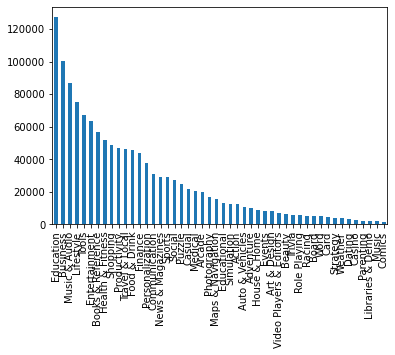

In [61]:
chart_filtered2.Category.value_counts().plot(kind='bar')

## Rating의 값을 확인하고 몇개가 있는 지 확인

In [62]:
chart_filtered2.Rating.value_counts()

0.00    558058
5.00     52774
4.20     52617
4.40     52063
4.30     50787
4.60     46748
4.50     46555
4.10     42422
4.00     40700
4.70     37322
4.80     35119
3.90     33693
3.80     32395
3.70     26040
4.90     24146
3.60     21503
3.50     19033
3.40     17095
3.30     13538
3.20     12869
3.00     10259
3.10      9346
2.80      7394
2.90      6930
2.70      5592
2.60      5487
2.50      4232
2.40      3678
2.30      3283
2.20      3005
2.00      2285
2.10      2200
1.80      1717
1.90      1620
1.70      1190
1.60       979
1.50       731
1.40       600
1.30       367
1.00       359
1.20       320
1.10       140
Name: Rating, dtype: int64

# 그래프로 시각화
## 평점 0점대의 앱들이 압도적으로 많다는 것을 확인

<AxesSubplot:>

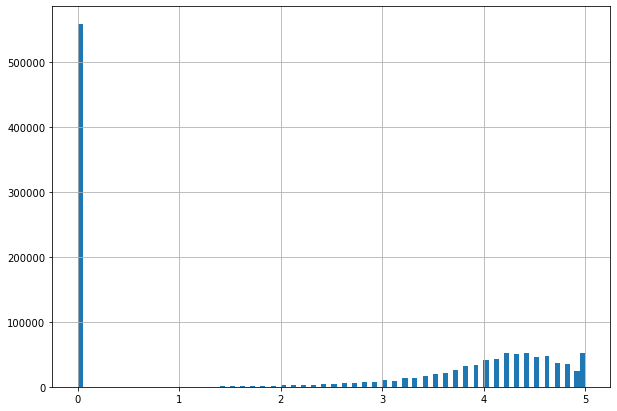

In [63]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(10,7))
chart_filtered2.Rating.hist(ax=ax, bins=100)

## Free의 값을 확인하고 몇개가 있는 지 확인

In [64]:
chart_filtered2.Free.value_counts()

True     1263566
False      23625
Name: Free, dtype: int64

## 평점과 무료의 값을 시각화

<AxesSubplot:xlabel='Count', ylabel='Rating'>

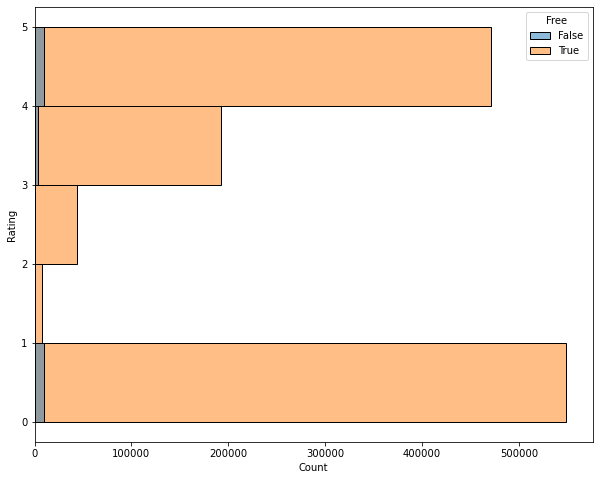

In [ ]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(10,8))
sns.histplot(data=chart_filtered2, y='Rating', hue='Free', ax=ax, binwidth=1)

---

# 분석 결과 
## 1. 어플중 가장 많이 발매된 분야는 교육 분야이며 그중에서도 2021 6월 가장 발매량이 높은 것 을 확인
## 2. 마찬가지로 교육분야가 가장 많이 발매된 것을 확인
## 3. 또한 어플중 평점이 0인 어플이 가장 많은 것을 확인
## 4. 하지만 무료 어플 중에는 0점 뿐만 아니라 5점평점이 많은것을 확인